<a href="https://colab.research.google.com/github/EAName/yelp-reviews/blob/main/EDA_Yelp_Business_Rabia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# !python -m pip install basemap


In [47]:
#!python -m pip install basemap-data-hires

In [3]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import statistics

#from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [21]:
df =pd.read_csv('/content/gdrive/MyDrive/yelp_dataset/yelp_business_clean_version1.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (43,44,45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [59]:
df = df.iloc[:,1:]

In [26]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [60]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,market,Caters,RestaurantsDelivery,RestaurantsTakeOut,HasTV,BusinessAcceptsCreditCards,OutdoorSeating,BusinessParking,Ambience,RestaurantsPriceRange2,GoodForKids,RestaurantsReservations,RestaurantsGoodForGroups,BikeParking,GoodForMeal,DogsAllowed,HappyHour,WheelchairAccessible,RestaurantsTableService,BusinessAcceptsBitcoin,Music,GoodForDancing,CoatCheck,BestNights,BYOB,ByAppointmentOnly,DriveThru,Corkage,RestaurantsCounterService,Open24Hours,AcceptsInsurance,DietaryRestrictions,AgesAllowed_21plus,AgesAllowed_allages,Alcohol_None,Alcohol_beer_and_wine,Alcohol_full_bar,BYOBCorkage_no,BYOBCorkage_yes_corkage,BYOBCorkage_yes_free,NoiseLevel_average,NoiseLevel_loud,NoiseLevel_quiet,NoiseLevel_very_loud,RestaurantsAttire_casual,RestaurantsAttire_dressy,RestaurantsAttire_formal,Smoking_no,Smoking_outdoor,Smoking_yes,WiFi_free,WiFi_no,WiFi_paid
0,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123.0,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", '...","Pubs, Restaurants, Italian, Bars, American (Tr...",NaN,St. Louis,True,False,True,True,True,True,"{'garage': False, 'street': False, 'validated'...","{'romantic': False, 'intimate': False, 'touris...",1.0,True,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227.0,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",Indianapolis,NaN,True,True,True,True,False,"{'garage': None, 'street': False, 'validated':...","{'touristy': None, 'hipster': None, 'romantic'...",1.0,True,False,True,False,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",Philadelphia,NaN,True,True,False,True,True,"{u'valet': False, u'garage': None, u'street': ...","{'touristy': False, 'hipster': False, 'romanti...",2.0,False,True,True,NaN,"{'dessert': True, 'latenight': None, 'lunch': ...",False,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
3,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147.0,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",Philadelphia,True,NaN,True,True,True,NaN,"{'garage': False, 'street': True, 'validated':...","{'touristy': False, 'hipster': False, 'romanti...",1.0,True,False,False,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
4,kfNv-JZpuN6TVNSO6hHdkw,Hibachi Express,6625 E 82nd St,Indianapolis,IN,46250.0,39.904320,-86.053080,4.0,20,1,"{'RestaurantsDelivery': 'True', 'RestaurantsTa...","Steakhouses, Asian Fusion, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",Indianapolis,NaN,True,True,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
df.describe()

,Unnamed: 0,postal_code,latitude,longitude,stars,review_count,is_open,RestaurantsPriceRange2,AgesAllowed_21plus,AgesAllowed_allages,...,NoiseLevel_very_loud,RestaurantsAttire_casual,RestaurantsAttire_dressy,RestaurantsAttire_formal,Smoking_no,Smoking_outdoor,Smoking_yes,WiFi_free,WiFi_no,WiFi_paid
count,35290.000000,35289.000000,35290.000000,35290.000000,35290.000000,35290.000000,35290.000000,30051.000000,35290.000000,35290.000000,...,35290.000000,35290.000000,35290.000000,35290.000000,35290.000000,35290.000000,35290.000000,35290.000000,35290.000000,35290.000000
mean,75241.345169,41769.045340,36.224552,-86.209418,3.589799,101.226353,0.627543,1.714718,0.000312,0.001474,...,0.017484,0.765146,0.018787,0.001105,0.047776,0.034344,0.004165,0.374610,0.350354,0.005639
std,43459.794268,24841.179919,4.906649,12.729917,0.725472,206.410720,0.483466,0.571400,0.017653,0.038359,...,0.131067,0.423914,0.135775,0.033226,0.213294,0.182114,0.064407,0.484029,0.477088,0.074882
min,8.000000,7836.000000,27.564457,-120.083748,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37286.250000,19147.000000,30.038550,-90.089860,3.000000,16.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75482.000000,34606.000000,38.786073,-82.750033,3.500000,41.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,112809.500000,63110.000000,39.950389,-75.288643,4.000000,109.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,150336.000000,336140.000000,43.773686,-74.664459,5.000000,7568.000000,1.000000,4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Star Ratings ')

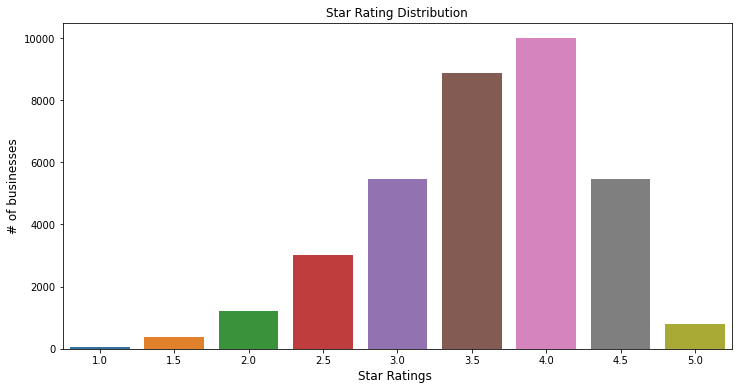

In [22]:
plt.figure(figsize=(12,6))
ax = sns.countplot(df['stars'])
plt.title('Distribution of rating');
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


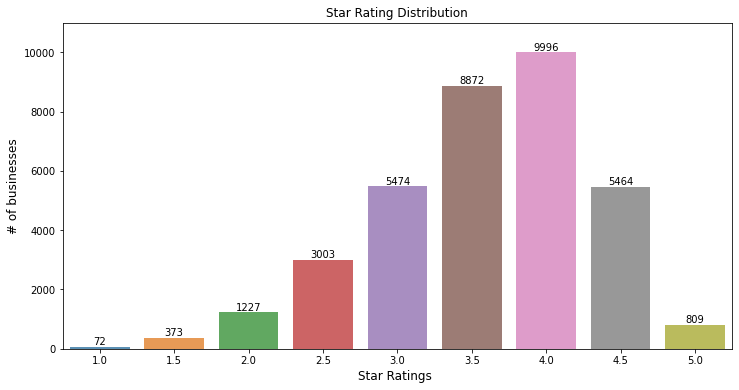

In [23]:
#Get the distribution of the ratings
x=df['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(12,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)
ax.set_ylim(0, 11000)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+5, label, ha='center', va='bottom')

plt.show()

Text(0.5, 0, 'Market ')

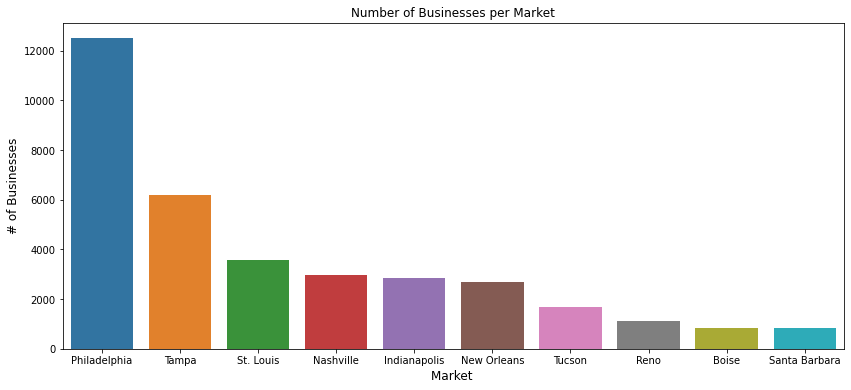

In [32]:
plt.figure(figsize=(14,6))

sns.countplot(x = 'market',
              data = df,
              order = df['market'].value_counts().index)
plt.title("Number of Businesses per Market")
plt.ylabel('# of Businesses', fontsize=12)
plt.xlabel('Market ', fontsize=12)


Text(0.5, 0, 'Market ')

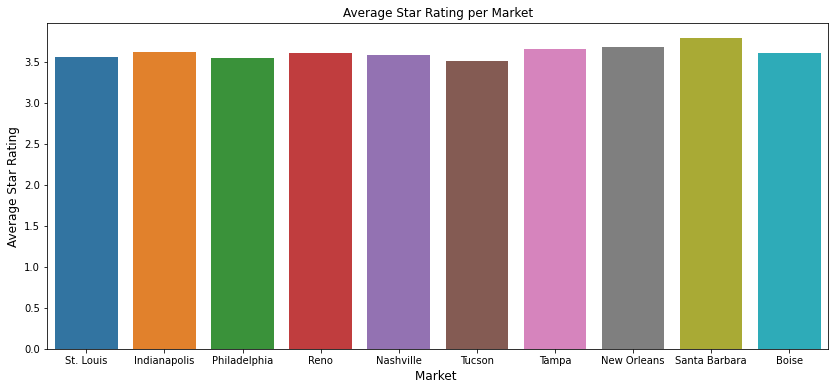

In [46]:
plt.figure(figsize=(14,6))


sns.barplot(x="market", y="stars", data=df, ci=None);

plt.title("Average Star Rating per Market")
plt.ylabel('Average Star Rating', fontsize=12)
plt.xlabel('Market ', fontsize=12)

In [61]:
df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'market', 'Caters',
       'RestaurantsDelivery', 'RestaurantsTakeOut', 'HasTV',
       'BusinessAcceptsCreditCards', 'OutdoorSeating', 'BusinessParking',
       'Ambience', 'RestaurantsPriceRange2', 'GoodForKids',
       'RestaurantsReservations', 'RestaurantsGoodForGroups', 'BikeParking',
       'GoodForMeal', 'DogsAllowed', 'HappyHour', 'WheelchairAccessible',
       'RestaurantsTableService', 'BusinessAcceptsBitcoin', 'Music',
       'GoodForDancing', 'CoatCheck', 'BestNights', 'BYOB',
       'ByAppointmentOnly', 'DriveThru', 'Corkage',
       'RestaurantsCounterService', 'Open24Hours', 'AcceptsInsurance',
       'DietaryRestrictions', 'AgesAllowed_21plus', 'AgesAllowed_allages',
       'Alcohol_None', 'Alcohol_beer_and_wine', 'Alcohol_full_bar',
       'BYOBCorkage_no', 'BYOBCorkage_yes_corkage', 'B

In [53]:
df.isna().sum()

Unnamed: 0                        0
business_id                       0
name                              0
address                          75
city                              0
state                             0
postal_code                       1
latitude                          0
longitude                         0
stars                             0
review_count                      0
is_open                           0
attributes                      376
categories                        0
hours                          5505
market                            0
Caters                        11893
RestaurantsDelivery            4972
RestaurantsTakeOut             3222
HasTV                          5610
BusinessAcceptsCreditCards     3154
OutdoorSeating                 5851
BusinessParking                4100
Ambience                       5743
RestaurantsPriceRange2         5239
GoodForKids                    6510
RestaurantsReservations        5325
RestaurantsGoodForGroups    

In [93]:
# Only attributes

column_names = ['Caters','RestaurantsDelivery', 'RestaurantsTakeOut', 'HasTV',
       'BusinessAcceptsCreditCards', 'OutdoorSeating', 'RestaurantsPriceRange2', 'GoodForKids',
       'RestaurantsReservations', 'RestaurantsGoodForGroups', 'BikeParking', 'DogsAllowed', 'HappyHour', 'WheelchairAccessible',
       'RestaurantsTableService', 'BusinessAcceptsBitcoin', 'GoodForDancing', 'CoatCheck', 'BYOB',
       'ByAppointmentOnly', 'DriveThru', 'Corkage',
       'RestaurantsCounterService', 'Open24Hours', 'AcceptsInsurance', 'AgesAllowed_21plus', 'AgesAllowed_allages',
       'Alcohol_None', 'Alcohol_beer_and_wine', 'Alcohol_full_bar',
       'BYOBCorkage_no', 'BYOBCorkage_yes_corkage', 'BYOBCorkage_yes_free',
       'NoiseLevel_average', 'NoiseLevel_loud', 'NoiseLevel_quiet',
       'NoiseLevel_very_loud', 'RestaurantsAttire_casual',
       'RestaurantsAttire_dressy', 'RestaurantsAttire_formal', 'Smoking_no',
       'Smoking_outdoor', 'Smoking_yes', 'WiFi_free', 'WiFi_no', 'WiFi_paid']

In [87]:
df2 = df.fillna('missing', inplace=False)

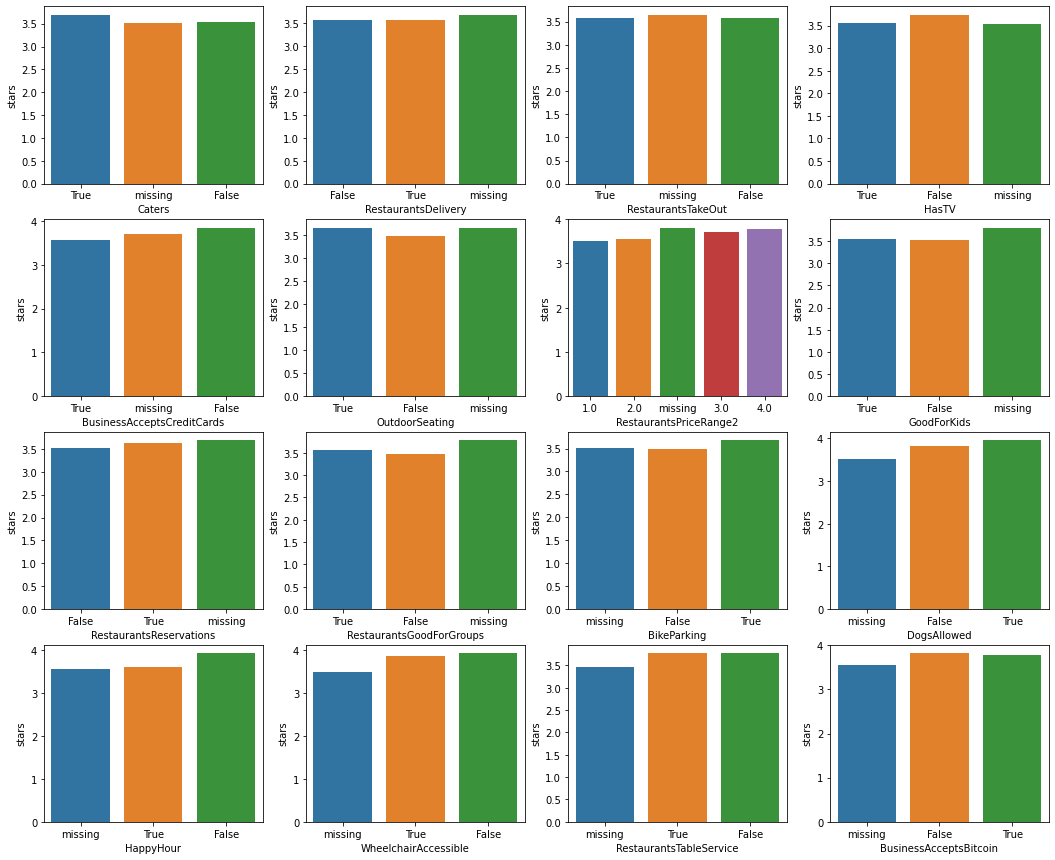

In [91]:
count=0
fig,axes=plt.subplots(4,4,figsize=(18,15))

for i in column_names[0:16]:
  sns.barplot(x=i, y="stars", data=df2, ci=None, ax=axes[count//4,count%4])
  count+=1

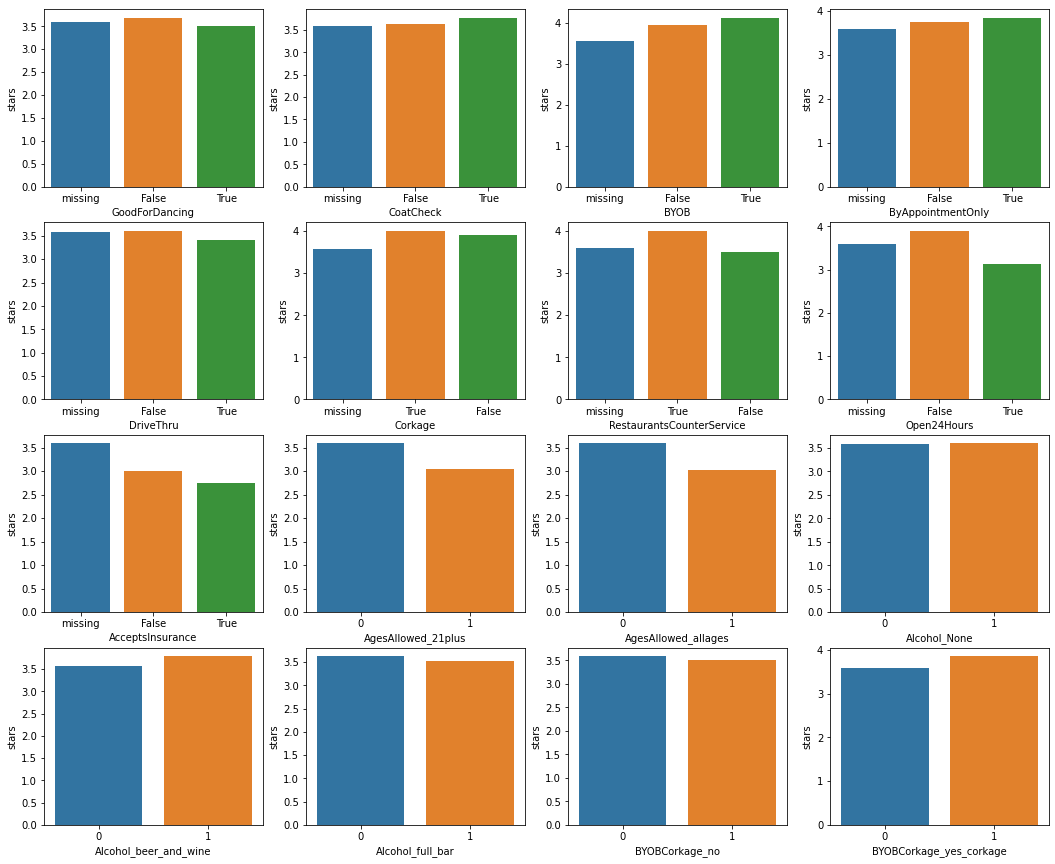

In [96]:
count=0
fig,axes=plt.subplots(4,4,figsize=(18,15))

for i in column_names[16:32]:
  sns.barplot(x=i, y="stars", data=df2, ci=None, ax=axes[count//4,count%4])
  count+=1

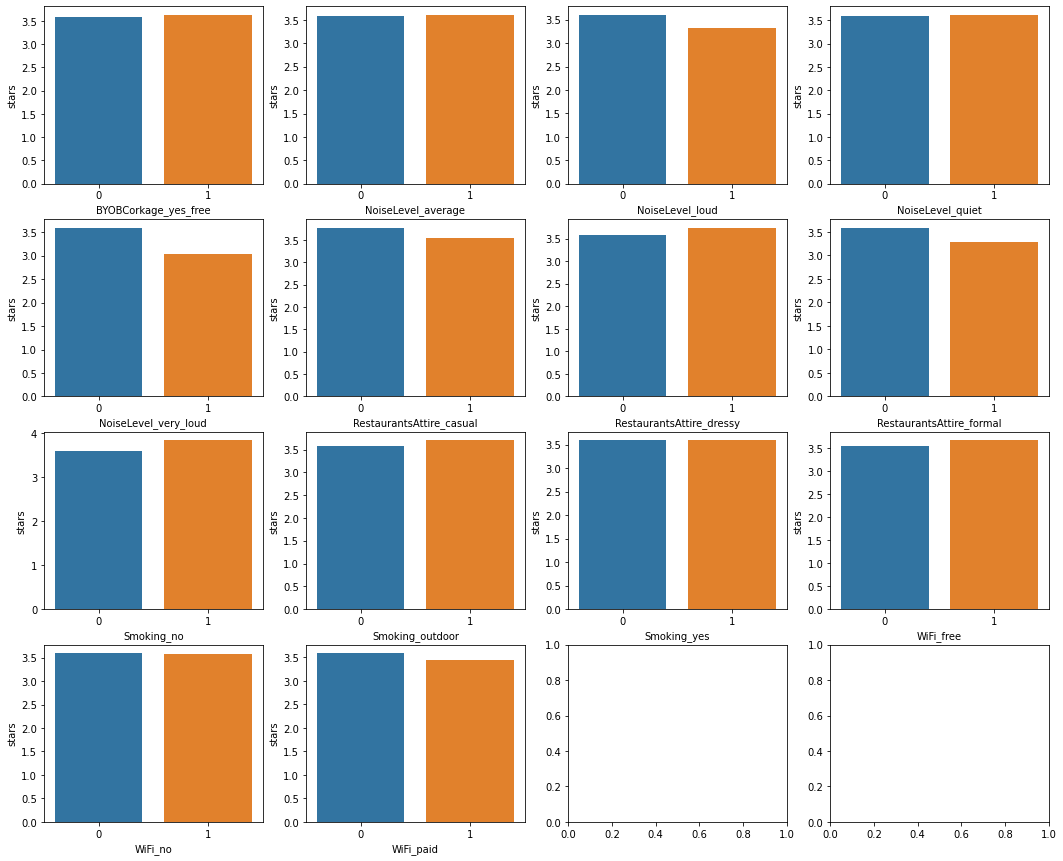

In [99]:
count=0
fig,axes=plt.subplots(4,4,figsize=(18,15))

for i in column_names[32:]:
  sns.barplot(x=i, y="stars", data=df2, ci=None, ax=axes[count//4,count%4])
  count+=1

Text(0.5, 0, 'DietaryRestrictions ')

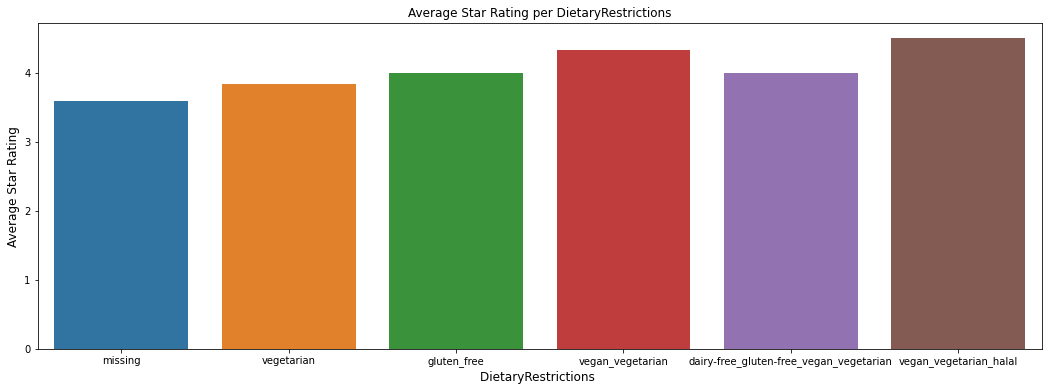

In [95]:
plt.figure(figsize=(18,6))


sns.barplot(x="DietaryRestrictions", y="stars", data=df2, ci=None);

plt.title("Average Star Rating per DietaryRestrictions")
plt.ylabel('Average Star Rating', fontsize=12)
plt.xlabel('DietaryRestrictions ', fontsize=12)

In [107]:
for i in column_names:
 # print(i)
  print(df2.groupby([i]).agg({'stars': ['mean', 'median', 'count']}))
  print('\n')

            stars              
             mean median  count
Caters                         
False    3.530503    3.5   9409
True     3.692844    4.0  13988
missing  3.515513    3.5  11893


                        stars              
                         mean median  count
RestaurantsDelivery                        
False                3.583481    3.5  12985
True                 3.566521    3.5  17333
missing              3.687450    4.0   4972


                       stars              
                        mean median  count
RestaurantsTakeOut                        
False               3.585569    3.5   1379
True                3.583939    3.5  30689
missing             3.647424    4.0   3222


            stars              
             mean median  count
HasTV                          
False    3.737514    4.0   6387
True     3.564783    3.5  23293
missing  3.525490    3.5   5610


                               stars              
                                mea

## Explore Reviews Dataset

In [37]:
df_r =pd.read_csv('/content/gdrive/MyDrive/yelp_dataset/yelp_reviews_version2.csv')

In [39]:
df_r.dtypes

Unnamed: 0       int64
user_id         object
business_id     object
date            object
stars          float64
text            object
dtype: object

In [40]:
df_r['year'] = df_r['date'].str[:4]

In [41]:
df_r.head()

,Unnamed: 0,user_id,business_id,date,stars,text,year
0,0,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,2014-02-05 20:30:30,3.0,Family diner. Had the buffet. Eclectic assortm...,2014
1,1,n33TJBR6BPLrkOZiOdXLVg,YjUWPpI6HXG530lwP-fb2A,2015-09-10 02:41:13,2.0,Let me start by saying the service is AWESOME!...,2015
2,2,d3Jj46Fvsx9AT0f6z8NQcw,YjUWPpI6HXG530lwP-fb2A,2017-08-18 01:42:46,5.0,Went here for the first time for the dinner bu...,2017
3,3,aOGtShQrhkVF0REtkJCNkA,YjUWPpI6HXG530lwP-fb2A,2015-09-26 16:13:09,5.0,This is my 1st experience here at Kettle. The...,2015
4,4,-rGU3wo4fgEnGRboYdMTjw,YjUWPpI6HXG530lwP-fb2A,2015-06-22 16:08:27,3.0,"Located on the west side of Starr Pass Blvd, K...",2015


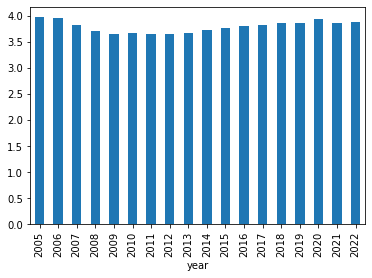

In [42]:
df_r.groupby('year')['stars'].mean().plot.bar()
